<a href="https://colab.research.google.com/github/Yashvardhan0904/Digits_classification/blob/main/Digit_classifiaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


Loding the MNIST data from Keras.Datasets

In [ ]:
( X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
type(X_train), type(y_train) , type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [ ]:
#shape of the numpy array
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Traning data (60000).Images
Test data (10000)Images
Image dimension = 28*28
Graysacle channel --> 1

In [ ]:
#printing 11 image
print (X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

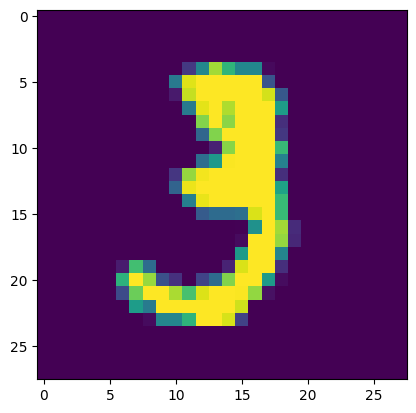

3


In [ ]:
# Displaying the image
plt.imshow(X_train[10])
plt.show ()
# Displaying corrensponding label
print(y_train[10] )

In [ ]:
#unique value in y train
print(np.unique(y_train))

# unique value in y test
print(np.unique (y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One  Hot Encoding

All these images in this dataset are of same size if not then we have to make them of same size / dimension

In [ ]:
#scaling the values
X_train = X_train/255
X_test = X_test/255


In [ ]:
# printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network

In [ ]:
#setting up the layers of neural network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Traning neural network
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8472 - loss: 0.5319
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9546 - loss: 0.1497
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9669 - loss: 0.1083
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9734 - loss: 0.0851
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9789 - loss: 0.0695
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9825 - loss: 0.0582
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9847 - loss: 0.0489
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9870 - loss: 0.0416
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9888 - loss: 0.0358
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9904 - loss: 0.0312
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9915 - loss: 0.0268
Epoch 12/20
1875/1875 ━━━━━━━━

Training data accuracy 99.61 %


**Accuracy on Test Data**




In [ ]:

loss , accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9677 - loss: 0.1752


In [ ]:

print(accuracy)

0.9710999727249146


Test data accuracy is 97.1 %


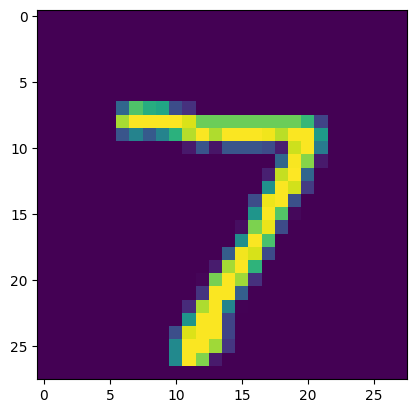

7


In [ ]:
# first datapoint  in X_test
plt.imshow(X_test[0])
plt.show()
print(y_test[0])

In [ ]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print (Y_pred[0])

[1.4637991e-06 1.5423889e-04 4.7291035e-04 2.2360134e-01 2.6519539e-10
 8.9429175e-09 6.5885417e-19 1.0000000e+00 2.0201769e-07 8.6110264e-01]


model.predict()gives the prediction probability of each class for the data point

In [ ]:
#converrting the predicted probabilites to the class labels
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
# converting the prediction probabilities to class label for all data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
print(Y_pred)

[[1.4637991e-06 1.5423889e-04 4.7291035e-04 ... 1.0000000e+00
  2.0201769e-07 8.6110264e-01]
 [1.7770763e-09 8.2250312e-02 9.9999988e-01 ... 1.0491059e-17
  4.3726436e-09 1.3853261e-22]
 [6.7645205e-06 9.9999309e-01 7.9381689e-02 ... 3.5300054e-02
  8.3421301e-03 6.2228565e-04]
 ...
 [3.8348449e-20 1.4678622e-04 1.3597807e-15 ... 7.2840154e-01
  9.1818183e-06 9.9997997e-01]
 [7.6480782e-15 2.0240303e-09 3.0490615e-15 ... 6.5025404e-07
  9.0837246e-01 4.4840262e-10]
 [7.3655187e-03 3.2536412e-16 3.9340937e-11 ... 4.9371555e-17
  3.2551571e-07 9.2463715e-16]]


Y_test --> True Labels

Y_pred_labels --> Predicted labels


Confusion matrix

In [ ]:
conf_mat = confusion_matrix(y_test, Y_pred_labels)


In [ ]:
print(conf_mat)

tf.Tensor(
[[ 966    1    1    1    3    1    4    0    1    2]
 [   1 1117    3    1    1    1    4    3    3    1]
 [   7    1  977   15    3    0    4   14   11    0]
 [   0    0    2  988    0    3    0    6    4    7]
 [   0    0    3    1  962    0    4    3    0    9]
 [   3    0    0   20    1  854    4    2    5    3]
 [   5    3    0    1    9    5  932    0    3    0]
 [   2    2    8    2    2    1    0  999    1   11]
 [   4    0    1    8    5   10    2    3  930   11]
 [   0    3    0    4   10    1    1    3    1  986]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

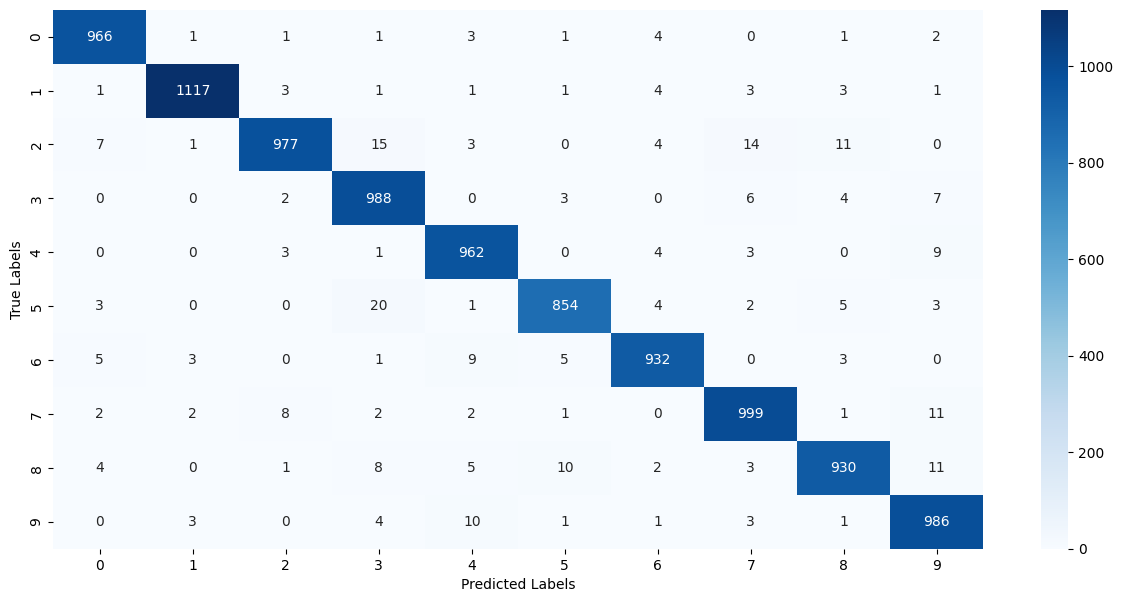

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**BUILDING A PREDICTIVE SYSTEM ***

In [ ]:
input_image_path = '/content/DIGIT9.png'
input_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)
input_image_resized = cv2.resize(input_image, (28,28))
input_image_resized = input_image_resized/255
input_image_reshaped = np.reshape(input_image_resized, (1,28,28))

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
cv2_imshow(input_image)

In [ ]:
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

In [ ]:
input_prediction_label = np.argmax(input_prediction)
print(input_prediction_label)

PREDICTIVE SYSTEM

In [ ]:
import numpy as np

# Convert the image to the correct shape
input_image_resized = np.expand_dims(input_image_resized, axis=0)  # Add batch dimension

# Ensure the input is in float32 format and normalized (if required by your model)
input_image_resized = input_image_resized.astype('float32') / 255.0

# Predict using the model
input_prediction = model.predict(input_image_resized)
print(input_prediction)

# Get the predicted class label
input_prediction_label = np.argmax(input_prediction)
print("Predicted Label:", input_prediction_label)


In [ ]:
input_image_path = input('Enter the path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
input_image_resized = cv2.resize(gray, (28,28))
input_prediction = model.predict(input_image_resized)
print(input_prediction)
input_prediction_label = np.argmax(input_prediction)
print('The Handwrittern Digits is recognized as :',input_prediction_label)

In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# Convert image to grayscale and resize
gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
input_image_resized = cv2.resize(gray, (28, 28))

# Add batch and channel dimensions
input_image_resized = np.expand_dims(input_image_resized, axis=0)  # Batch dimension
input_image_resized = np.expand_dims(input_image_resized, axis=-1)  # Channel dimension

# Normalize pixel values and ensure correct data type
input_image_resized = input_image_resized.astype('float32') / 255.0

# Verify the shape
print(f"Shape before prediction: {input_image_resized.shape}")
print(f"Model expected input shape: {model.input_shape}")

# Ensure input is a TensorFlow tensor with a known shape (if needed)
input_image_resized = tf.convert_to_tensor(input_image_resized, dtype=tf.float32)

# Predict
input_prediction = model.predict(input_image_resized)
print(input_prediction)

# Get the predicted label
input_prediction_label = np.argmax(input_prediction)
print(f"Predicted Label: {input_prediction_label}")
